In [8]:
from math import sqrt
import numpy as np
from cvxopt import matrix
from cvxopt.blas import nrm2, dot
from cvxopt.solvers import qp, socp, options
import matplotlib.pyplot as plt
%matplotlib inline

### Covariance matrix $\Sigma$ and its Cholesky decomposition $U$

$\Sigma = U^T U$

In [9]:
names = ['Ant', 'Bee', 'Croc', 'Dino']
n = len(names)

Cov = 0.1 * matrix(
    [[ 0.1138, -0.0137,  0.0218, -0.0102],
     [-0.0137,  0.0274, -0.0028,  0.0040],
     [ 0.0218, -0.0028,  0.0213, -0.0016],
     [-0.0102,  0.0040, -0.0016,  0.0143]])

rootCov = np.linalg.cholesky(Cov).T
print("Cholesky factorization:")
print(rootCov)
print("\nCheck:")
print(rootCov.T @ rootCov)
rootCov = matrix(rootCov)

Cholesky factorization:
[[ 0.10667708 -0.0128425   0.0204355  -0.00956157]
 [ 0.          0.05074515 -0.00034599  0.0054627 ]
 [ 0.          0.          0.04137959  0.00090106]
 [ 0.          0.          0.          0.03616522]]

Check:
[[ 0.01138 -0.00137  0.00218 -0.00102]
 [-0.00137  0.00274 -0.00028  0.0004 ]
 [ 0.00218 -0.00028  0.00213 -0.00016]
 [-0.00102  0.0004  -0.00016  0.00143]]


### Sample portfolio

In [10]:
alphas = matrix([0.01, 0.02, 0.03, 0.04])

MM = 1000000
portf0 = MM * matrix([0.1, 0.2, 0.3, 0.4])

Portfolio variance and risk

In [11]:
portf0variance = (portf0.T * Cov * portf0)[0,0]
portf0risk = sqrt(portf0variance)
print(portf0risk)

25105.776227792678


Checking that portfoli risk equals $\|G w\|_2$

In [12]:
nrm2(rootCov * portf0)

25105.77622779268

Portfolio expected return

In [13]:
portf0return = (alphas.T * portf0)[0, 0]
print(portf0return)

30000.0


## Problem 1

Maximize the expected return for a given level of risk 

In [14]:
netInvested = MM
maximalRisk = 25000

Conic formulation:
    $$
    \begin{aligned}
    c^{T} x &\to\ \mbox{min}\\
    s_0 &= h_0 - G_0 x \\
    s_0 &\succeq 0 \\
    s_1 & = h_1 - G_1 x \\
    s_1 &\in \mathcal{C} \\
    A x &= b
    \end{aligned}
    $$

$ x = \begin{pmatrix} r\\ w_1 \\ \vdots \\ w_n \end{pmatrix} $

### Optimization constraint

In [15]:
coeffUtil1 = matrix([0.0, -1*alphas])
print(coeffUtil1)

[ 0.00e+00]
[-1.00e-02]
[-2.00e-02]
[-3.00e-02]
[-4.00e-02]



### Constraint 0 (Linear)

Risk positive, investments positive

In [16]:
e5 = matrix(0.0, (5,5))
e5[::6] = 1.0
G0 = matrix([[1.0], [matrix(0.0, (1,4))]])
G0 = matrix([G0, -1.0*e5])
h0 = matrix([[maximalRisk, matrix(0.0, (5,1))]])

print(G0)
print(h0)

[ 1.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00]
[-1.00e+00 -0.00e+00 -0.00e+00 -0.00e+00 -0.00e+00]
[-0.00e+00 -1.00e+00 -0.00e+00 -0.00e+00 -0.00e+00]
[-0.00e+00 -0.00e+00 -1.00e+00 -0.00e+00 -0.00e+00]
[-0.00e+00 -0.00e+00 -0.00e+00 -1.00e+00 -0.00e+00]
[-0.00e+00 -0.00e+00 -0.00e+00 -0.00e+00 -1.00e+00]

[ 2.50e+04]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]



### Constraint 1 (Conic)

$\displaystyle s1 = {r \choose G x}$ 

In [17]:
z4 = matrix(0.0, (1,4))
G1 = matrix([[-1, z4.T],[z4, -1.0*rootCov]])
h1 = matrix(0.0, (5,1))

print(G1)
print(h1)

[-1.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00]
[ 0.00e+00 -1.07e-01  1.28e-02 -2.04e-02  9.56e-03]
[ 0.00e+00 -0.00e+00 -5.07e-02  3.46e-04 -5.46e-03]
[ 0.00e+00 -0.00e+00 -0.00e+00 -4.14e-02 -9.01e-04]
[ 0.00e+00 -0.00e+00 -0.00e+00 -0.00e+00 -3.62e-02]

[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]



### Linear constraint
Fully invested portfolio: $\left( 0, e^T \right) x = 1000000$

In [18]:
A = matrix([[0.0], [matrix(1.0, (1,4))]])
b = matrix(float(netInvested), (1,1))
print(A)
print(b)

[ 0.00e+00  1.00e+00  1.00e+00  1.00e+00  1.00e+00]

[ 1.00e+06]



### Optimizer call
http://cvxopt.org/userguide/coneprog.html#second-order-cone-programming

In [7]:
solution1 = socp(coeffUtil1, G0, h0, [G1], [h1], A, b)

NameError: name 'coeffUtil1' is not defined

In [13]:
solution1

{'dual infeasibility': 3.641286043848554e-08,
 'dual objective': -32811.16397701068,
 'dual slack': 3.2328030328101123e-09,
 'gap': 0.016443068425783254,
 'iterations': 8,
 'primal infeasibility': 4.127299279913593e-08,
 'primal objective': -32811.16597285626,
 'primal slack': 7.362141785396568e-05,
 'relative gap': 5.011424598377923e-07,
 'residual as dual infeasibility certificate': None,
 'residual as primal infeasibility certificate': None,
 'sl': <6x1 matrix, tc='d'>,
 'sq': [<5x1 matrix, tc='d'>],
 'status': 'optimal',
 'x': <5x1 matrix, tc='d'>,
 'y': <1x1 matrix, tc='d'>,
 'zl': <6x1 matrix, tc='d'>,
 'zq': [<5x1 matrix, tc='d'>]}

In [14]:
portf1 = solution1['x'][1:5]
print(sum(portf1))

1000000.0000000002


In [15]:
portf1variance = (portf1.T * Cov * portf1)[0,0]
portf1risk = sqrt(portf1variance)
print(portf1risk)

portf1return = (alphas.T * portf1)[0, 0]
print(portf1return)

24999.999717163682
32811.165972856266


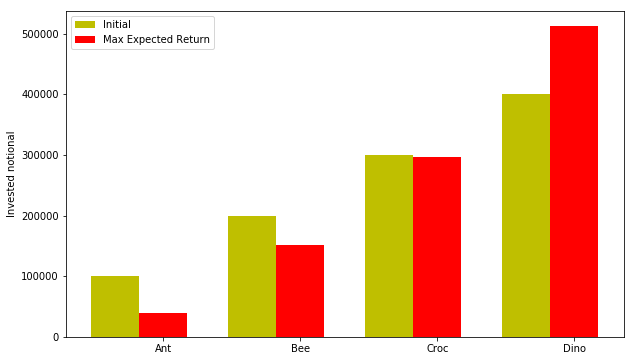

In [16]:
ind = np.arange(n)    # the horizontal locations for the groups
width = 0.35          # the width of the bars: can also be len(x) sequence
plt.figure(figsize=(10,6))
p0 = plt.bar(ind, [x for x in portf0], width, color='y')
p1 = plt.bar(ind+width, [x for x in portf1], width, color='r')

plt.ylabel('Invested notional')
plt.xticks(ind + width, names)
plt.legend((p0[0], p1[0]), ('Initial', 'Max Expected Return'), loc=2)

plt.show()

## Problem 2

Minimize the risk for the expected level of return

In [17]:
coeffUtil2 = matrix([1.0, z4.T])
print(coeffUtil2)

[ 1.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]



In [18]:
minReturn = 30000

G0 = matrix([[0.0], [-1*alphas.T]])
G0 = matrix([G0, -1.0*e5])
print(G0)

h0 = matrix([[-minReturn, matrix(0.0, (5,1))]])
print(h0)

[ 0.00e+00 -1.00e-02 -2.00e-02 -3.00e-02 -4.00e-02]
[-1.00e+00 -0.00e+00 -0.00e+00 -0.00e+00 -0.00e+00]
[-0.00e+00 -1.00e+00 -0.00e+00 -0.00e+00 -0.00e+00]
[-0.00e+00 -0.00e+00 -1.00e+00 -0.00e+00 -0.00e+00]
[-0.00e+00 -0.00e+00 -0.00e+00 -1.00e+00 -0.00e+00]
[-0.00e+00 -0.00e+00 -0.00e+00 -0.00e+00 -1.00e+00]

[-3.00e+04]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]



In [19]:
solution2 = socp(coeffUtil2, G0, h0, [G1], [h1], A, b)

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00  3.0000e+04  1e+06  3e+00  3e+00  1e+00
 1:  3.0629e+04  5.4084e+04  4e+05  1e+00  1e+00  1e+04
 2:  2.8103e+04  3.5444e+04  9e+04  2e-01  2e-01  5e+03
 3:  2.5590e+04  2.6394e+04  1e+04  3e-02  3e-02  5e+02
 4:  2.4565e+04  2.4700e+04  1e+03  4e-03  4e-03  1e+02
 5:  2.4585e+04  2.4608e+04  2e+02  5e-04  5e-04  2e+01
 6:  2.4573e+04  2.4574e+04  6e+00  2e-05  2e-05  7e-01
 7:  2.4573e+04  2.4573e+04  2e-01  7e-07  7e-07  3e-02
 8:  2.4573e+04  2.4573e+04  7e-03  2e-08  2e-08  8e-04
Optimal solution found.


In [20]:
print(solution2['sl'])

[ 9.12e+02]
[ 2.46e+04]
[ 6.53e+04]
[ 2.17e+05]
[ 2.78e+05]
[ 4.39e+05]



In [21]:
portf2 = solution2['x'][1:5]

portf2variance = (portf2.T * Cov * portf2)[0,0]
portf2risk = sqrt(portf2variance)
print(portf2risk)

portf2return = (alphas.T * portf2)[0, 0]
print(portf2return)

24572.69096086509
30911.834843412114


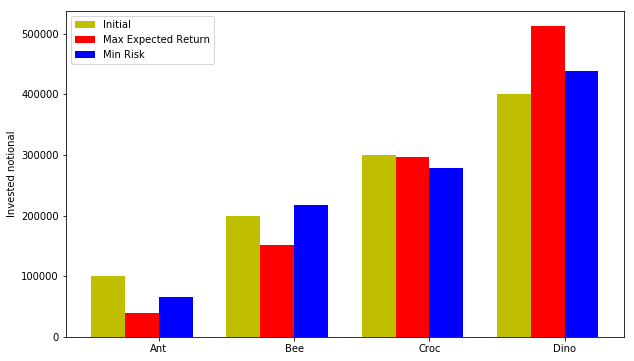

In [22]:
ind = np.arange(n)    # the horizontal locations for the groups
width = 0.25          # the width of the bars: can also be len(x) sequence
plt.figure(figsize=(10,6))
p0 = plt.bar(ind, [x for x in portf0], width, color='y')
p1 = plt.bar(ind+width, [x for x in portf1], width, color='r')
p2 = plt.bar(ind+width*2., [x for x in portf2], width, color='b')

plt.ylabel('Invested notional')
plt.xticks(ind + width*1.5, names)
plt.legend((p0[0], p1[0], p2[0]), ('Initial', 'Max Expected Return', 'Min Risk'), loc=2)

plt.show()

## Problem 3

Markowitz mean-variance optimization. The utility function is a weighted sum of expected return and risk: 
$c = (\lambda, -\alpha^T)$, 
where $\lambda$ is a risk-aversion parameter

In [24]:
def meanVariance(riskAversion, netInvested, printSystem=False):
    # utility function
    coeffUtil = matrix([riskAversion, -1.0*alphas])
    
    # investment limit plus positivity constraints
    G0 = matrix([matrix([[0.0],[matrix(1.0, (1,4))]]),
                 -1.0*matrix(np.eye(5))])
    h0 = matrix([[netInvested, matrix(0.0, (5,1))]])

    # conic constraint
    z4 = matrix(0.0, (1,4))
    G1 = matrix([[-1, z4.T],[z4, -1.0*rootCov]])
    h1 = matrix(0.0, (5,1))    
    
    # linear constraint = full investment
    A = matrix([[0.0], [matrix(1.0, (1,4))]])
    b = matrix(float(netInvested), (1,1))
    
    if printSystem:
        print("----------------")
        print(f"h0:\n{h0}")
        print(f"G0:\n{G0}")
        print(f"h1:\n{h1}")
        print(f"G1:\n{G1}")
        print("----------------")
    # call the optimizer
    solution = socp(coeffUtil, G0, h0, [G1], [h1], A, b)

    return solution['x'][1:5]

In [25]:
pi = meanVariance(1.0, MM, True)

----------------
h0:
[ 1.00e+06]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]

G0:
[ 0.00e+00  1.00e+00  1.00e+00  1.00e+00  1.00e+00]
[-1.00e+00 -0.00e+00 -0.00e+00 -0.00e+00 -0.00e+00]
[-0.00e+00 -1.00e+00 -0.00e+00 -0.00e+00 -0.00e+00]
[-0.00e+00 -0.00e+00 -1.00e+00 -0.00e+00 -0.00e+00]
[-0.00e+00 -0.00e+00 -0.00e+00 -1.00e+00 -0.00e+00]
[-0.00e+00 -0.00e+00 -0.00e+00 -0.00e+00 -1.00e+00]

h1:
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]

G1:
[-1.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00]
[ 0.00e+00 -1.07e-01  1.28e-02 -2.04e-02  9.56e-03]
[ 0.00e+00 -0.00e+00 -5.07e-02  3.46e-04 -5.46e-03]
[ 0.00e+00 -0.00e+00 -0.00e+00 -4.14e-02 -9.01e-04]
[ 0.00e+00 -0.00e+00 -0.00e+00 -0.00e+00 -3.62e-02]

----------------
     pcost       dcost       gap    pres   dres   k/t
 0: -2.5036e+04 -1.0400e+06  1e+06  9e-02  2e+00  1e+00
 1:  8.5157e+03 -2.4427e+05  3e+05  2e-02  5e-01  1e+04
 2:  1.6966e+03 -5.6352e+04  7e+04  5e-03  1e-01  4e+03
 3: -8.7656e+03 -5.3

In [26]:
print(dot(alphas,pi))
print(sqrt(dot(pi, Cov*pi)))

35504.13099203421
26975.832424259435


In [27]:
# Compute trade-off.
N = 20
raps = [ 10**(2.0*t/(N-1)-1.0) for t in range(N) ]
portfolios = [ meanVariance(lam, MM) for lam in raps ]
returns = [ dot(alphas,pi) for pi in portfolios ]
risks = [ sqrt(dot(pi, Cov*pi)) for pi in portfolios ]

     pcost       dcost       gap    pres   dres   k/t
 0: -2.5036e+04 -1.0400e+06  1e+06  9e-02  2e+00  1e+00
 1: -2.2347e+04 -2.2669e+05  2e+05  2e-02  4e-01  2e+03
 2: -2.3273e+04 -4.0116e+04  2e+04  1e-03  3e-02  3e+02
 3: -3.1791e+04 -4.0207e+04  1e+04  8e-04  2e-02  5e+02
 4: -3.5459e+04 -3.6887e+04  2e+03  1e-04  3e-03  1e+02
 5: -3.5717e+04 -3.6578e+04  1e+03  8e-05  2e-03  8e+01
 6: -3.6106e+04 -3.6328e+04  3e+02  2e-05  5e-04  2e+01
 7: -3.6163e+04 -3.6260e+04  1e+02  9e-06  2e-04  1e+01
 8: -3.6205e+04 -3.6231e+04  3e+01  3e-06  6e-05  3e+00
 9: -3.6216e+04 -3.6220e+04  5e+00  4e-07  1e-05  6e-01
10: -3.6218e+04 -3.6219e+04  1e+00  9e-08  2e-06  1e-01
11: -3.6218e+04 -3.6218e+04  9e-02  8e-09  2e-07  1e-02
12: -3.6218e+04 -3.6218e+04  1e-02  1e-09  2e-08  2e-03
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0: -2.5036e+04 -1.0400e+06  1e+06  9e-02  2e+00  1e+00
 1: -2.1573e+04 -2.2188e+05  2e+05  2e-02  4e-01  2e+03
 2: -2.2194e+04 -4.1893e+04 

In [38]:
print(raps)

[0.1, 0.12742749857031338, 0.16237767391887217, 0.20691380811147897, 0.26366508987303583, 0.33598182862837817, 0.42813323987193935, 0.5455594781168519, 0.6951927961775606, 0.8858667904100825, 1.1288378916846888, 1.438449888287663, 1.8329807108324356, 2.3357214690901227, 2.9763514416313175, 3.79269019073225, 4.832930238571752, 6.158482110660264, 7.847599703514611, 10.0]


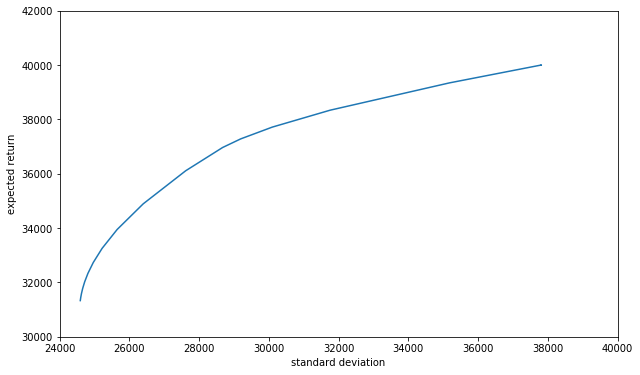

In [28]:
# Plot trade-off curve and optimal allocations.
plt.figure(figsize=(10,6))
plt.figure(1, facecolor='w')
plt.plot(risks, returns)
plt.xlabel('standard deviation')
plt.ylabel('expected return')
plt.axis([24000, 40000, 30000, 42000])
plt.show()